In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json

In [2]:
summary_plot = True
save_fig = True

## Techno-economic analysis summary results

In [3]:
with open ('input/tea_summary_data','r') as sourcefile:
    tea_data = json.load(sourcefile)

3.33 : 67
3.01 : 81.2
2.78 : 95
2.71 : 100


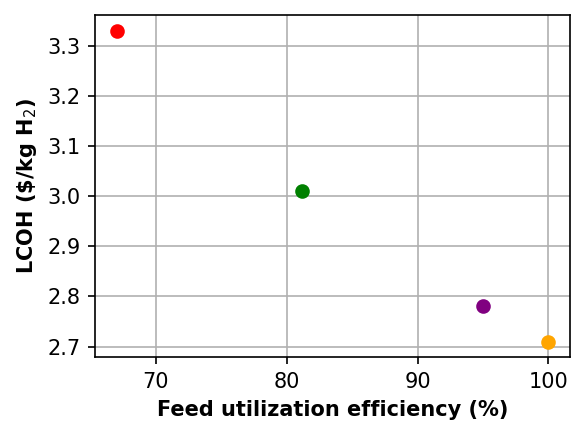

In [4]:
if summary_plot:
    # make plot for overall show
    efficiency = tea_data['efficiency']
    lcoh_list = tea_data['lcoh_list']

    for i in range(len(efficiency)):
        print(lcoh_list[i],':',efficiency[i])

    colors = ['red','green','purple','orange']

    # plot
    # format plot area
    fig = plt.figure(figsize=(4,3),dpi=150)
    plt.rcParams.update({"font.size": 10, "axes.labelweight":"bold"})

    xlabel="Feed utilization efficiency (%)"
    ylabel="LCOH (\$/kg H$_2$)"
    for i in range(len(efficiency)):
        plt.scatter(efficiency[i],lcoh_list[i],color=colors[i], zorder=3)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True,zorder=0)
    plt.tight_layout()

    if save_fig:
        plt.savefig("output/regression_fit_percent_jan25.png")
        plt.savefig("output/regression_fit_percent_jan25.pdf")
    plt.show()

## Opportunities to reduce LCOH

In [5]:
efficiency = [67,81.2,95,100]
lcoh_list = [3.33,3.01,2.78,2.71]
values = [2.16,3.0,2.41,3.33] # ,3.01 for 90% CC and WGS-MR baseline feed utilization efficiency
start_points  = [1.38,2.13,2.17,3.01] # ,2.17 for 90% CC and WGS-MR baseline feed utilization efficiency

# data for vertical lines
h2a_base = 3.33
wgs_mr_base = 3.01
data = {'efficiency':efficiency,
        'lcoh_list':lcoh_list,
       'values':values,
       'start_points':start_points,
       'h2a_base':h2a_base,
       'wgs_mr_base':wgs_mr_base}

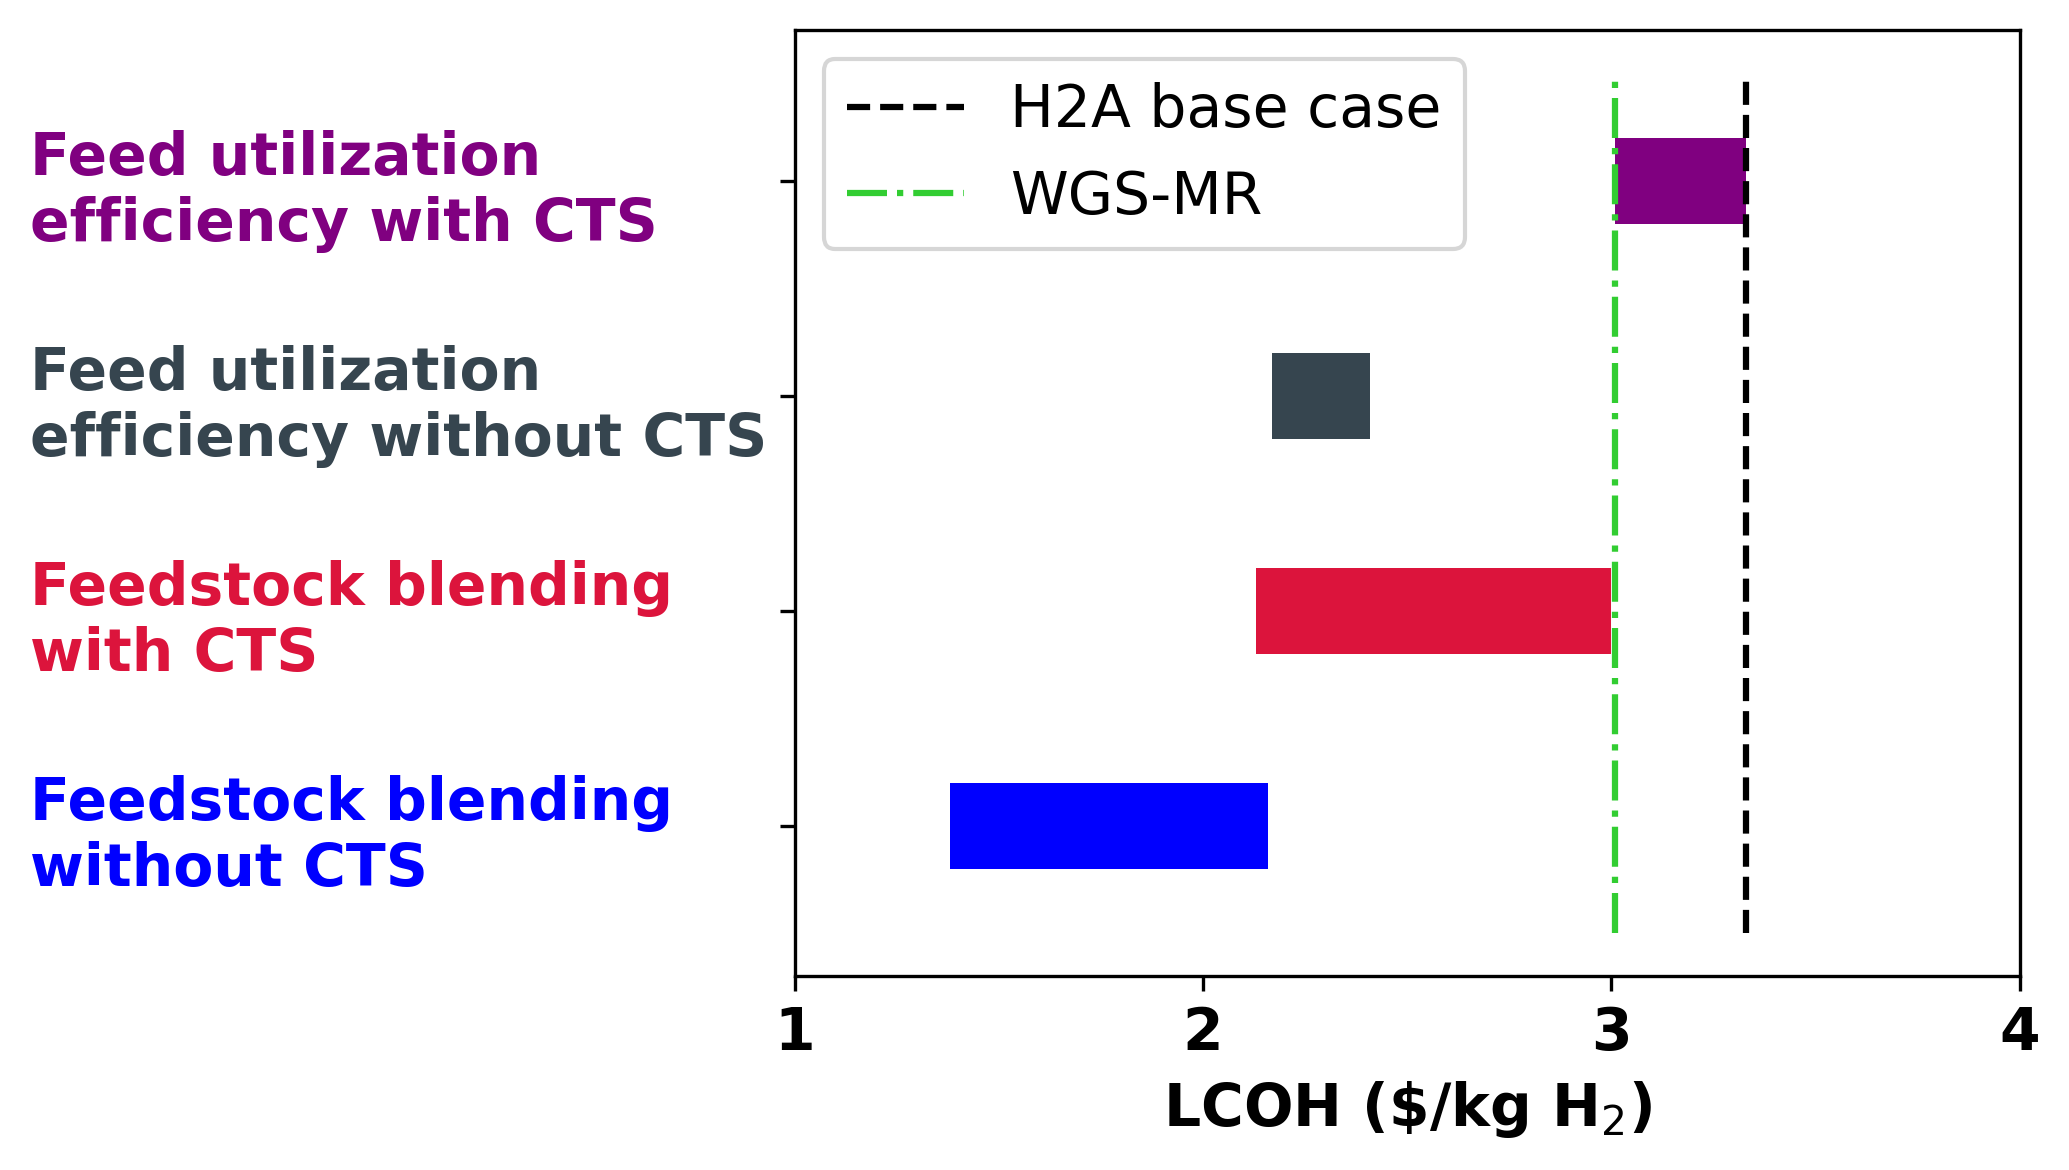

In [6]:
if summary_plot:
    # data
    opportunities = ['Feedstock blending \nwithout CTS','Feedstock blending \nwith CTS','Feed utilization \nefficiency without CTS','Feed utilization \nefficiency with CTS']

    values = tea_data['values'] # for 90% CC and WGS-MR baseline feed utilization efficiency
    start_points  = tea_data['start_points'] # for 90% CC and WGS-MR baseline feed utilization efficiency

    # data for vertical lines
    h2a_base = tea_data['h2a_base']
    wgs_mr_base = tea_data['wgs_mr_base']

    # specify colors
    colors = ['blue', 'crimson', '#36454F', 'purple']

    # create dataframe
    df = pd.DataFrame({'opps':opportunities,
                      'vals':values,
                      'colors':colors,
                     'origin':start_points})

    # create horizontal bar plot
    plt.figure(figsize=(7,4), dpi=300,)
    plt.barh(y=df['opps'], width=df['vals']-df['origin'], height=0.4, left=df['origin'], color=colors)

    # add vertical lines
    plt.vlines(h2a_base, ymin=-0.5, ymax=len(values)-0.5, colors='black', linestyles='dashed', label='H2A base case')
    plt.vlines(wgs_mr_base, ymin=-0.5, ymax=len(values)-0.5, colors='#32CD32', linestyles='-.', label='WGS-MR')
    plt.legend(fontsize=14)

    # set xticks
    plt.xticks(np.arange(1,5,1), fontsize=14, fontweight='bold')
    plt.yticks(fontsize=14, fontweight='bold')

    plt.xlabel('LCOH (\$/kg H$_2$)',fontsize=14, fontweight='bold')
    
    # color and align y-axis
    ax = plt.gca()
    ax.tick_params(axis='y', which='major', pad=180) # pad away from bars
    for label, color in zip(ax.get_yticklabels(), colors):
        label.set_color(color) # color 
        label.set_horizontalalignment('left') # align  left
        
    plt.tight_layout()

    # plt.tight_layout()
    if save_fig:
        plt.savefig("output/opportunities_to_reduce_lcoh.png")
        plt.savefig("output/opportunities_to_reduce_lcoh.pdf")
        plt.show()

## Percentage contributions to LCOH

In [7]:
cost_contribution = True

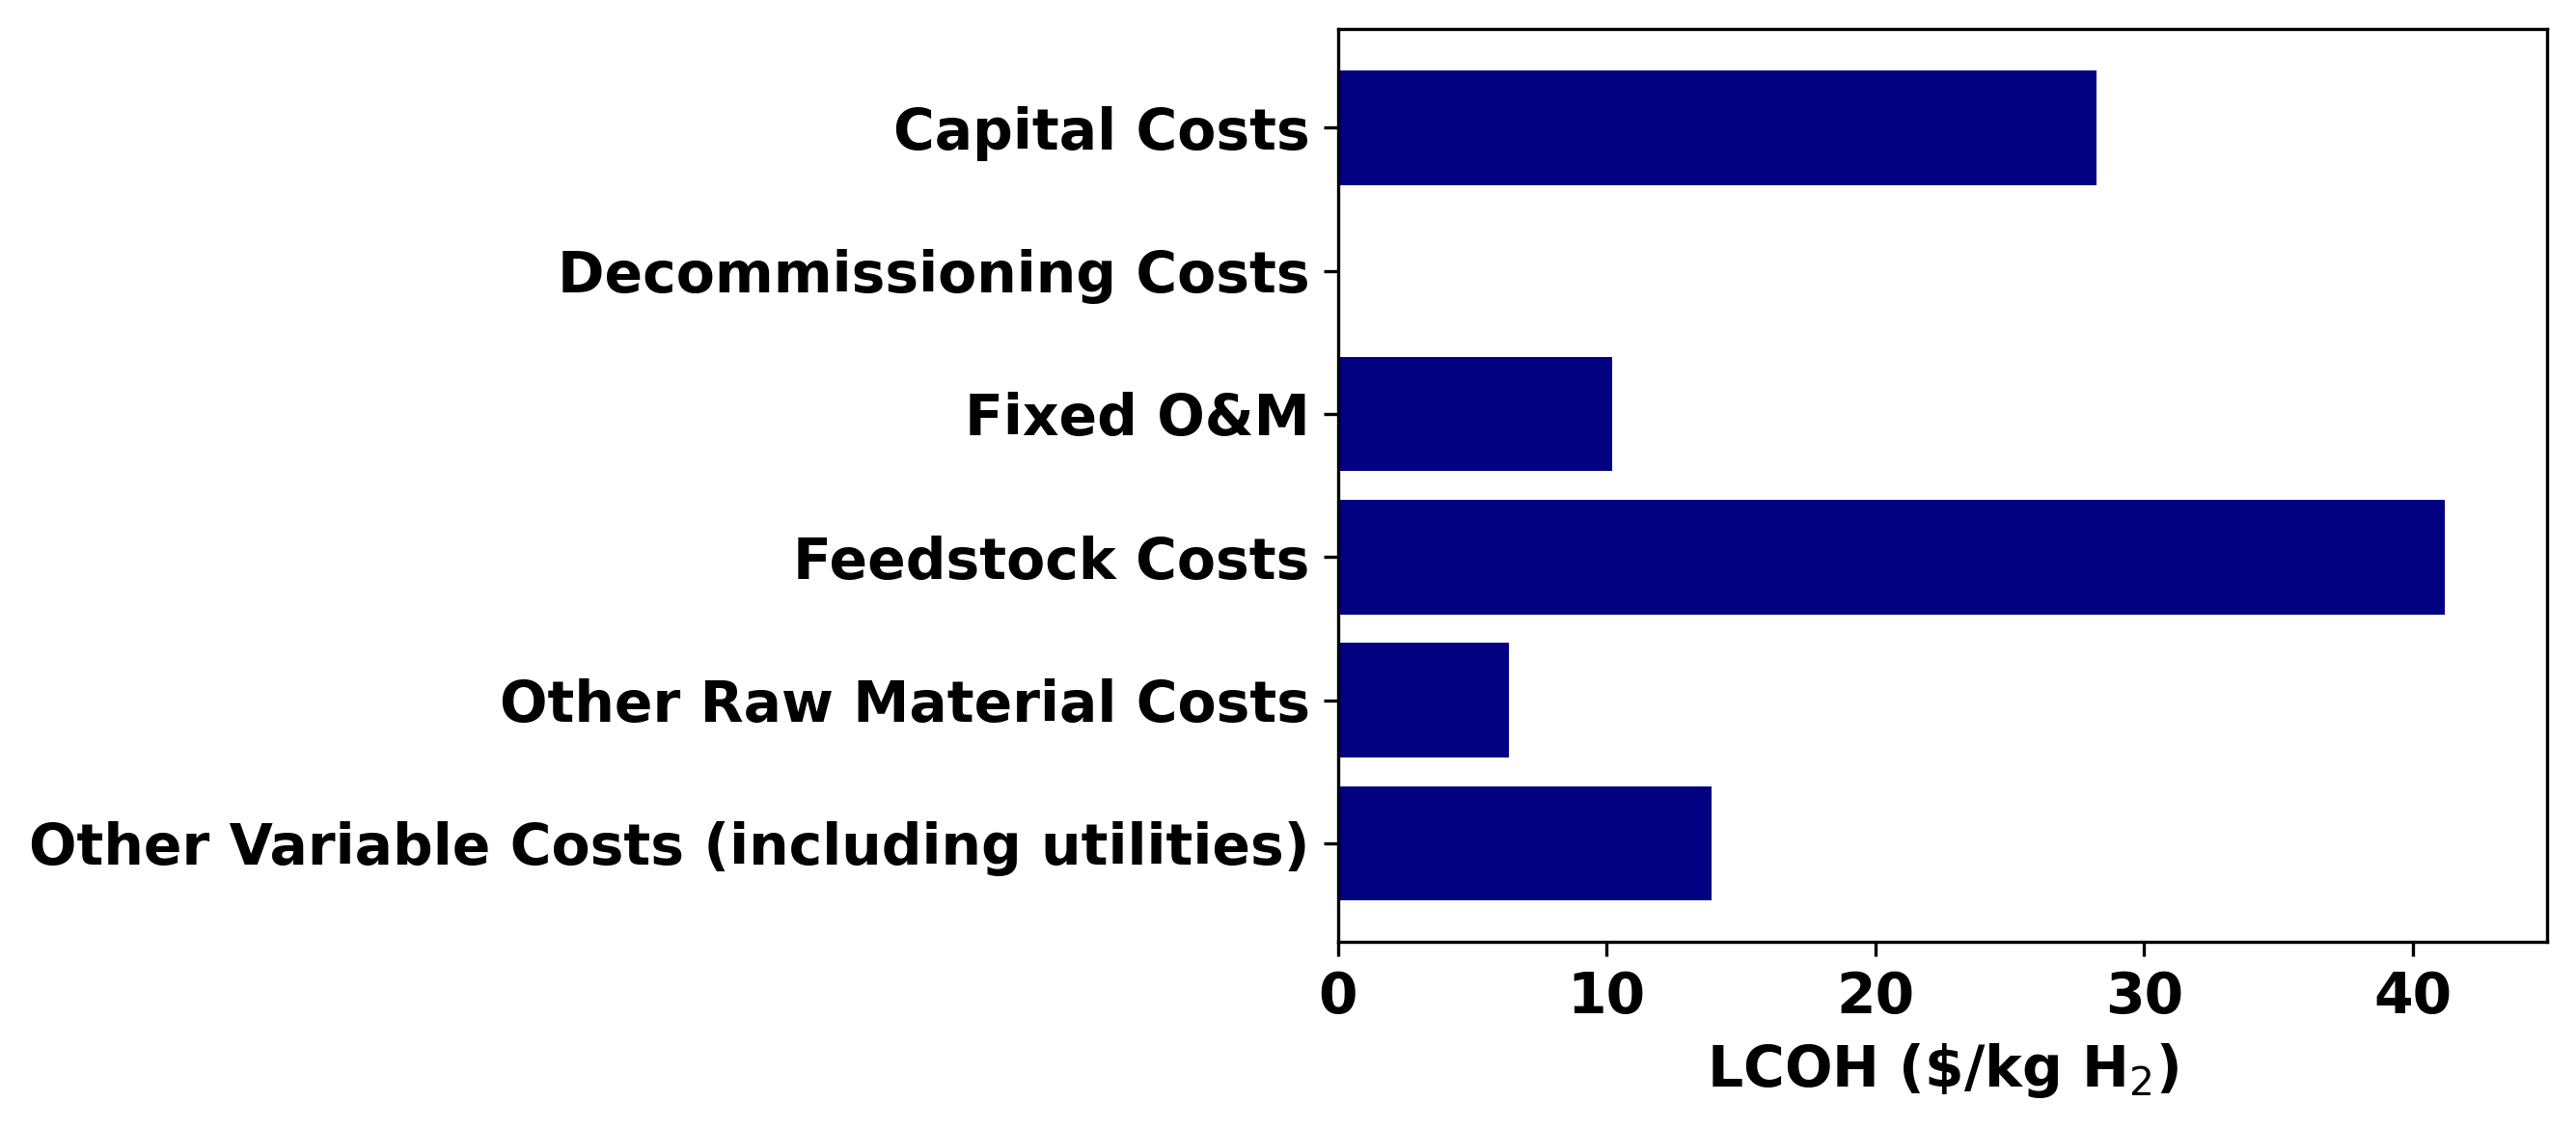

In [8]:
if cost_contribution:
    
    # load data
    cost_data = pd.read_csv("input/cost_contribution.csv")

    # create horizontal bar plot
    plt.figure(figsize=(9,4), dpi=300)
    plt.barh(cost_data['item'], cost_data['percent'], color='navy')

    # set xticks
    plt.xticks(np.arange(0,60,10), fontsize=14, fontweight='bold')
    plt.yticks(fontsize=14, fontweight='bold')
    plt.xlim(0,45)
    plt.xlabel('LCOH (\$/kg H$_2$)',fontsize=14, fontweight='bold')
    plt.tight_layout()

    # plt.tight_layout()
    if save_fig:
        plt.savefig("output/lcoh_percentage.png")
        plt.savefig("output/lcoh_percentage.pdf")
    plt.show()

## Supporting plots for opportunities to reduce LCOH

In [9]:
supporting_plots = True

In [10]:
if supporting_plots:
    # import data
    blending_file_path = 'input/blending_data.csv'
    blending_data = pd.read_csv(blending_file_path)
    blending_data.head()

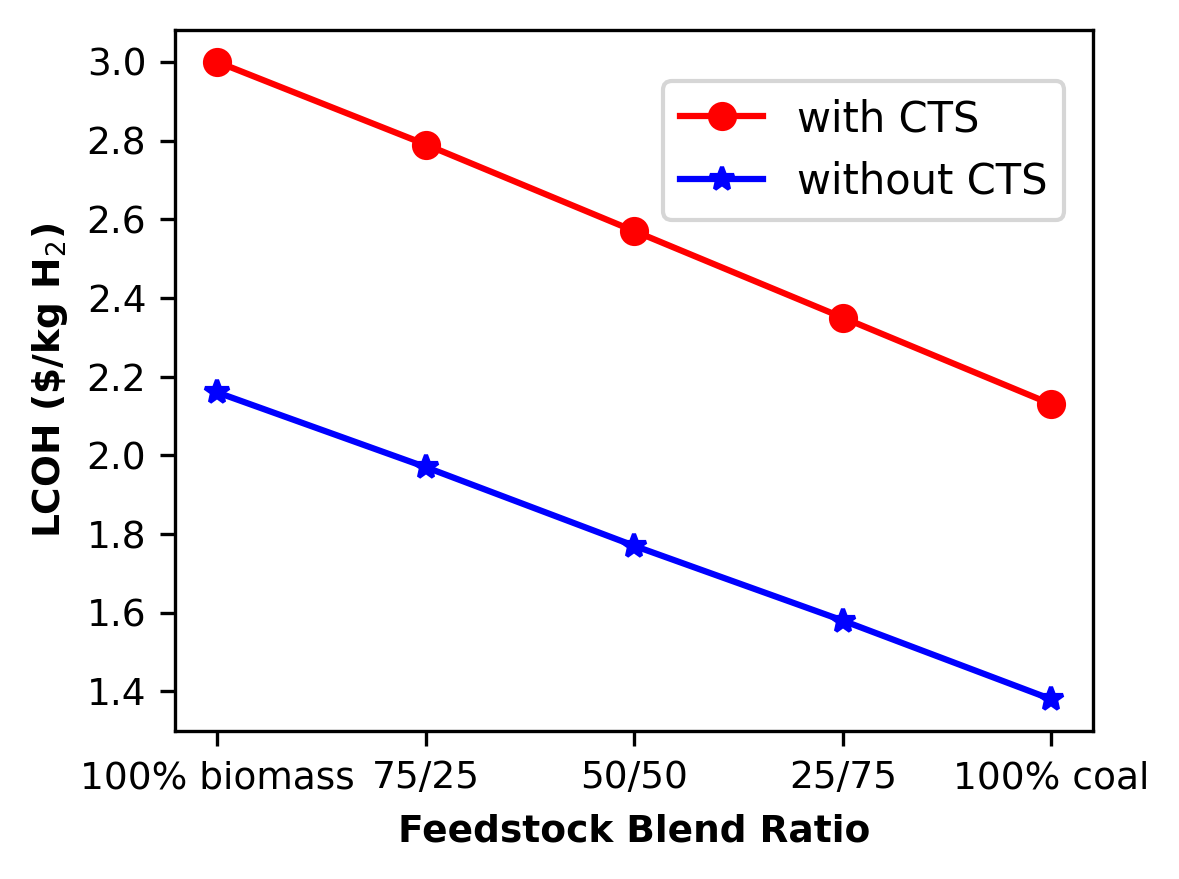

In [11]:
if supporting_plots:
    fig = plt.figure(figsize=(4,3),dpi=300)
    plt.rcParams.update({"font.size": 9, "axes.labelweight":"bold"})

    plt.plot(blending_data['Blend'],blending_data['with CTS'],'ro-',label='with CTS')
    plt.plot(blending_data['Blend'],blending_data['without CTS'],'b*-',label='without CTS')

    plt.ylabel('LCOH (\$/kg H$_2$)')
    plt.xlabel('Feedstock Blend Ratio')
    plt.legend(loc="lower center", fontsize=10, bbox_to_anchor=[0.75,0.7]) #, ncol=legend_col
    plt.tight_layout()

    if save_fig:
        plt.savefig('output/opportunities_data_blending.png',dpi=300)
        plt.savefig('output/opportunities_data_blending.pdf',dpi=300)
    plt.show()

In [12]:
separation_plots = True

In [13]:
if separation_plots:
    # import data
    separation_file_path = 'input/separation_data.csv'
    separation_data = pd.read_csv(separation_file_path)
    separation_data.head()

In [14]:
if separation_plots:
    separation_data.head()

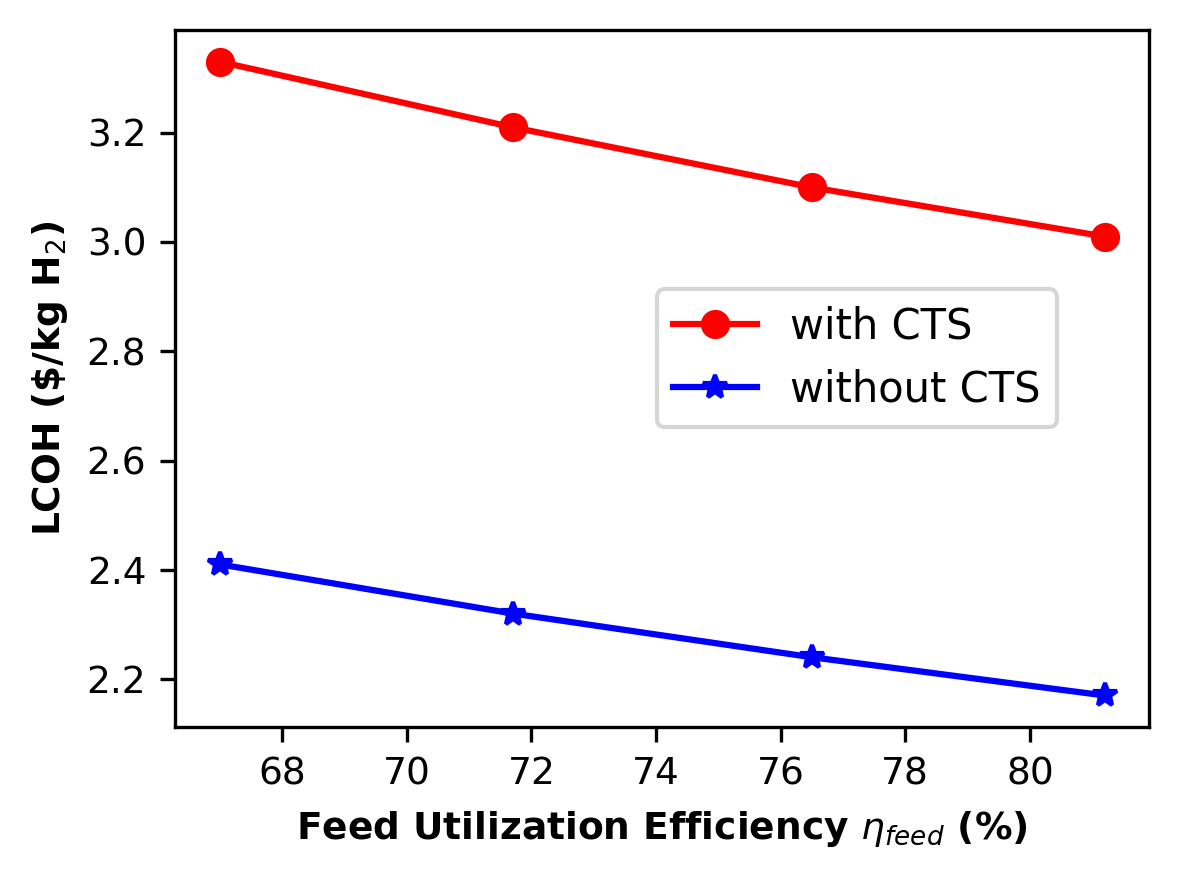

In [15]:
if separation_plots:
    fig = plt.figure(figsize=(4,3),dpi=300)
    plt.rcParams.update({"font.size": 9, "axes.labelweight":"bold"})

    plt.plot(separation_data['separation'],separation_data['with CTS'],'ro-',label='with CTS')
    plt.plot(separation_data['separation'],separation_data['without CTS'],'b*-',label='without CTS')

    plt.ylabel('LCOH (\$/kg H$_2$)')
    plt.xlabel('Feed Utilization Efficiency $\eta_{feed}$ (%)')
    plt.legend(loc="lower center", fontsize=10, bbox_to_anchor=[0.7,0.4]) #, ncol=legend_col
    plt.tight_layout()

    if save_fig:
        plt.savefig('output/opportunities_data_separation.png',dpi=300)
        plt.savefig('output/opportunities_data_separation.pdf',dpi=300)
    plt.show()

## Tornado plot for sensitivity of LCOH to cost factors

In [16]:
lcoh_tornado = True

In [17]:
# # load data
with open ('input/tornado_data','r') as sourcefile:
    tornado_data = json.load(sourcefile)

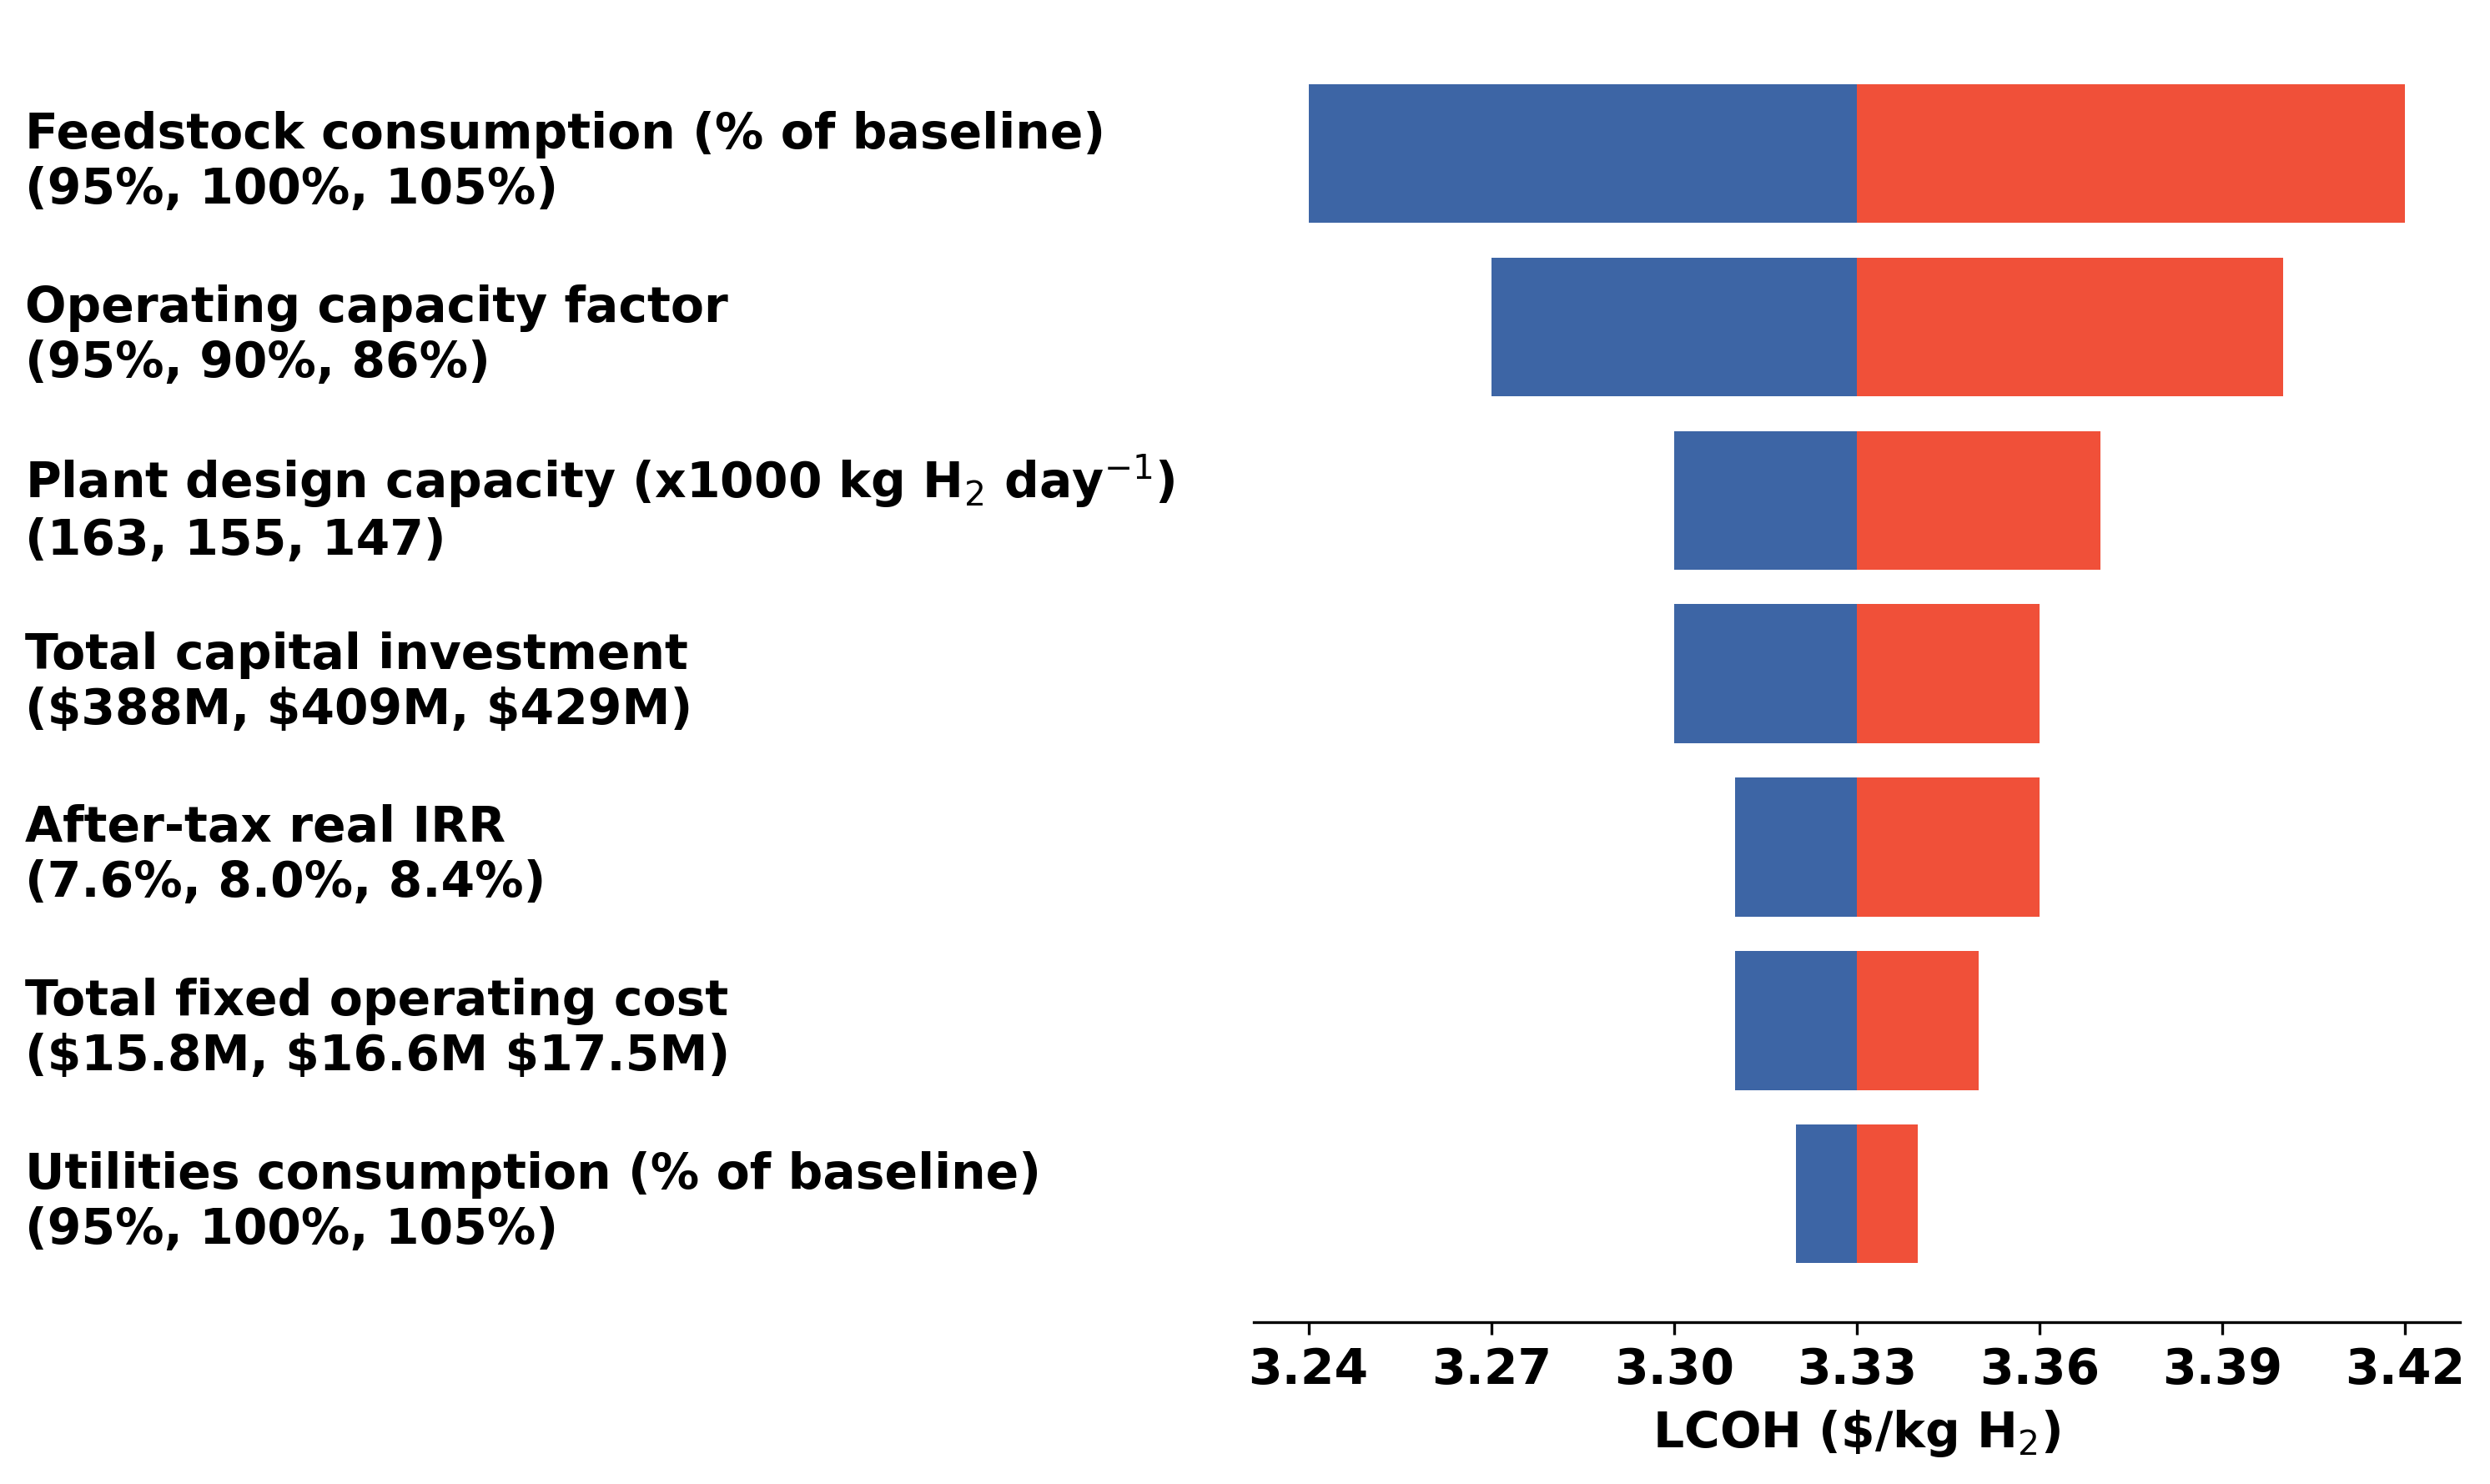

In [18]:
# prep data
left_bars = np.array(tornado_data['baseline']) - np.array(tornado_data['reduced'])
right_bars = np.array(tornado_data['increased']) - np.array(tornado_data['baseline'])
factors = tornado_data['factors']

# make tornado plot
fig, ax = plt.subplots(figsize=(10,6), dpi=300)
# plt.rcParams.update({"font.size": 14, "axes.labelweight":"bold"})

ax.barh(factors, right_bars, left=tornado_data['baseline'], color='#F05039', label='Increase')
ax.barh(factors, -left_bars, left=tornado_data['baseline'], color='#3D65A5', label='Decrease')

# add vertical baseline
# ax.axvline(tornado_data['baseline'], color='black', linestyle='--')

# color and align y-axis
ax = plt.gca()
ax.tick_params(axis='y', which='major', pad=350, width=0) # pad away from bars and remove '-'
for label in ax.get_yticklabels():
    label.set_horizontalalignment('left') # align  left

# plot elements 
ax.set_xlabel('LCOH (\$/kg H$_2$)', fontsize=14, fontweight='bold')
plt.xticks(np.arange(3.24,3.44,0.03), fontsize=14, fontweight='bold')
plt.yticks(fontsize=14, fontweight='bold')
ax.spines['left'].set_visible(False) # turn off y-axis line
ax.spines['top'].set_visible(False) 
ax.spines['right'].set_visible(False)
plt.tight_layout()

# save data
if save_fig:
    plt.savefig('output/lcoh_sensitivity_tornado.png')
    plt.savefig('output/lcoh_sensitivity_tornado.pdf')
plt.show()